In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import  cross_val_score
import time

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
df = pd.read_csv("dataset/final_data.csv")
df.head(2)

,duration,languages,topic,avg_sent_len,occupation,gender,sentiment_label,pscore
0,19.400000,60,13.0,58.072874,author,male,positive,0.028474
1,16.283333,43,5.0,107.044776,advocate,male,positive,0.033153


In [3]:
len(df[df['pscore'] >= 0.1])

190

In [4]:
df['rating'] = df['sentiment_label'].apply(lambda x: 1 if x == "positive" else 0)
df['isFemale'] = df['gender'].apply(lambda x: 1 if x == "female" else 0)
df = pd.concat([df,pd.get_dummies(df['occupation'], prefix='occupation')],axis=1)
df.head()

,duration,languages,topic,avg_sent_len,occupation,gender,sentiment_label,pscore,rating,isFemale,...,occupation_physicist,occupation_poet,occupation_psychologist,occupation_researcher,occupation_roboticist,occupation_scientist,occupation_singer,occupation_social,occupation_technologist,occupation_writer
0,19.400000,60,13.0,58.072874,author,male,positive,0.028474,1,0,...,0,0,0,0,0,0,0,0,0,0
1,16.283333,43,5.0,107.044776,advocate,male,positive,0.033153,1,0,...,0,0,0,0,0,0,0,0,0,0
2,21.433333,26,14.0,52.350365,historian,male,positive,0.036223,1,0,...,0,0,0,0,0,0,0,0,0,0
3,18.600000,35,8.0,85.892216,activist,male,positive,0.023299,1,0,...,0,0,0,0,0,0,0,0,0,0
4,19.833333,48,5.0,63.189427,expert,male,positive,0.055576,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.drop(['occupation'],axis=1, inplace=True)
df.drop(['gender'],axis=1, inplace=True)
df.drop(['sentiment_label'],axis=1, inplace=True)
df.head()

,duration,languages,topic,avg_sent_len,pscore,rating,isFemale,occupation_activist,occupation_advocate,occupation_architect,...,occupation_physicist,occupation_poet,occupation_psychologist,occupation_researcher,occupation_roboticist,occupation_scientist,occupation_singer,occupation_social,occupation_technologist,occupation_writer
0,19.400000,60,13.0,58.072874,0.028474,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16.283333,43,5.0,107.044776,0.033153,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,21.433333,26,14.0,52.350365,0.036223,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18.600000,35,8.0,85.892216,0.023299,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,19.833333,48,5.0,63.189427,0.055576,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df['isPopular'] = df['pscore'].apply(lambda x: 1 if x >= 0.1 else 0)
df.drop(['pscore'],axis=1, inplace=True)
df.head(2)

,duration,languages,topic,avg_sent_len,rating,isFemale,occupation_activist,occupation_advocate,occupation_architect,occupation_artist,...,occupation_poet,occupation_psychologist,occupation_researcher,occupation_roboticist,occupation_scientist,occupation_singer,occupation_social,occupation_technologist,occupation_writer,isPopular
0,19.400000,60,13.0,58.072874,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16.283333,43,5.0,107.044776,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
cols = df.columns
n = len(cols)
df_data = df[cols[:n-2]]
df_target = df[cols[n-1]]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.3, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [9]:
print("Total Instances: ", len(df))
print("Training Instances: ", len(X_train))
print("Development Instances: ", len(X_dev))
print("Testing Instances: ", len(X_test))

Total Instances:  2399
Training Instances:  1679
Development Instances:  360
Testing Instances:  360


## Experiment with Model

In [16]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, classification_report

Random Forest

 Scores:
    test_accuracy  test_precision  test_recall  test_roc_auc   test_f1
0       0.919643        0.571429     0.142857      0.713706  0.228571
1       0.910714        0.250000     0.035714      0.638741  0.062500
2       0.916667        0.500000     0.071429      0.732549  0.125000
3       0.931548        1.000000     0.178571      0.731563  0.303030
4       0.913433        0.000000     0.000000      0.639658  0.000000 

Dev Test Results:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       335
           1       0.83      0.20      0.32        25

    accuracy                           0.94       360
   macro avg       0.89      0.60      0.65       360
weighted avg       0.94      0.94      0.92       360



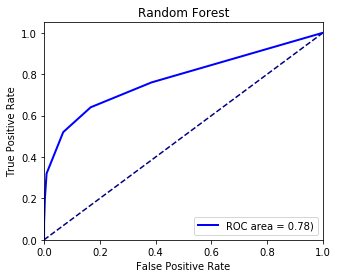

Decision Tree

 Scores:
    test_accuracy  test_precision  test_recall  test_roc_auc   test_f1
0       0.857143        0.236842     0.321429      0.613636  0.272727
1       0.883929        0.296296     0.285714      0.612013  0.290909
2       0.892857        0.366667     0.392857      0.665584  0.379310
3       0.889881        0.320000     0.285714      0.615260  0.301887
4       0.874627        0.250000     0.250000      0.590798  0.250000 

Dev Test Results:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       335
           1       0.16      0.28      0.21        25

    accuracy                           0.85       360
   macro avg       0.55      0.59      0.56       360
weighted avg       0.89      0.85      0.87       360



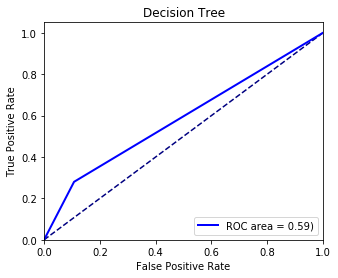

Logistic Regression

 Scores:
    test_accuracy  test_precision  test_recall  test_roc_auc   test_f1
0       0.928571        0.750000     0.214286      0.786526  0.333333
1       0.919643        0.666667     0.071429      0.742811  0.129032
2       0.916667        0.500000     0.071429      0.663381  0.125000
3       0.928571        0.833333     0.178571      0.744086  0.294118
4       0.913433        0.333333     0.035714      0.743602  0.064516 

Dev Test Results:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       335
           1       1.00      0.24      0.39        25

    accuracy                           0.95       360
   macro avg       0.97      0.62      0.68       360
weighted avg       0.95      0.95      0.93       360



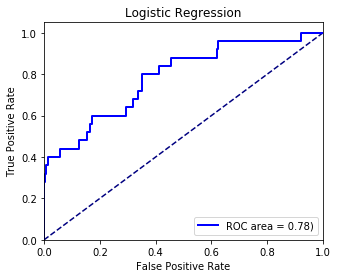

Naive Bayes

 Scores:
    test_accuracy  test_precision  test_recall  test_roc_auc   test_f1
0       0.342262        0.078603     0.642857      0.528003  0.140078
1       0.377976        0.079070     0.607143      0.476925  0.139918
2       0.422619        0.089109     0.642857      0.518321  0.156522
3       0.407738        0.105991     0.821429      0.644944  0.187755
4       0.337313        0.074561     0.607143      0.514076  0.132812 

Dev Test Results:
              precision    recall  f1-score   support

           0       0.98      0.38      0.55       335
           1       0.10      0.92      0.18        25

    accuracy                           0.42       360
   macro avg       0.54      0.65      0.36       360
weighted avg       0.92      0.42      0.52       360



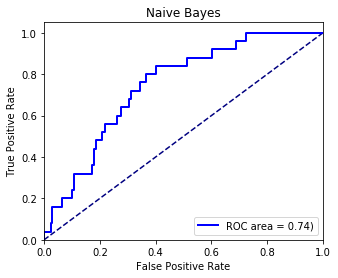

In [18]:
models = [RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression(), GaussianNB()]

trained_model = []
names = ["Random Forest", "Decision Tree", "Logistic Regression", "Naive Bayes"]
roc = []
f1score = []

for model, name in zip(models, names):
    print(name)

    scores = cross_validate(model, X_train, y_train, cv=5, return_estimator = True, 
                        scoring = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1'])
    df = pd.DataFrame(scores)
    clf = scores['estimator'][4]
    
    print('\n Scores:\n', df[['test_accuracy', 'test_precision', 'test_recall', 'test_roc_auc', 'test_f1']], '\n')
    
    pred = clf.predict(X_dev)
    predp = clf.predict_proba(X_dev)
    fpr, tpr, th = roc_curve(y_dev, predp[:,1])
    roc_auc = auc(fpr, tpr)
    
    print("Dev Test Results:")
    print(classification_report(y_dev, pred))
    f1score.append(f1_score(y_dev, pred))
    trained_model.append(clf)
    roc.append(roc_auc)
    
    ### Plot ROC Curve
    plt.figure(figsize = (5,4))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title(name)
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC area = %0.2f)' % roc_auc)
    plt.legend(loc="lower right")
    plt.show()


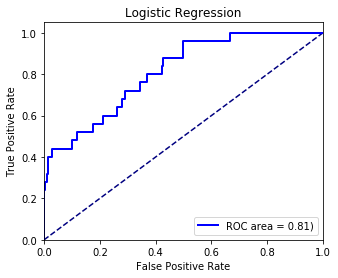

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       335
           1       0.88      0.28      0.42        25

    accuracy                           0.95       360
   macro avg       0.91      0.64      0.70       360
weighted avg       0.94      0.95      0.93       360



In [19]:
ind = np.argmax(np.array(roc))
clf = trained_model[ind]
yPred = clf.predict(X_test)
predictedprob = clf.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, predictedprob[:,1])

roc_auc = auc(fpr, tpr)
plt.figure(figsize = (5,4))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title(names[ind])
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

print(classification_report(y_test,yPred))